In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#識別子の作成
from sklearn.base import BaseEstimator, TransformerMixin

# sklearnのようなClassの作成

In [8]:
class SimpleConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.x_mean = None
          
    def fit(self, X, y=None):
        self.x_mean = X.mean(axis=0)
        self.transformed = pd.DataFrame(np.zeros_like(X))
        #print(self.x_mean)
        return self
    
    def transform(self, X):     
        self.transformed.columns = X.columns
        for col in X.columns:
            for row in range(X.shape[0]):
                self.transformed.loc[row, col] = X.loc[row , col]  - self.x_mean[col]
        return self.transformed

In [9]:
# サンプルデータの用意
boston = load_boston()
df_X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_y =  pd.Series(boston.target, name="MEDV")

In [10]:
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df_X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [12]:
df_X["CRIM"].max(), df_X["CRIM"].min(),df_X["CRIM"].mean() 

(88.9762, 0.00632, 3.6135235573122535)

In [13]:
df_X.mean(axis=0)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [14]:
mean_model = SimpleConverter()
mean_model.fit(df_X)
X_mean = mean_model.transform(df_X)
print(X_mean)

         CRIM         ZN     INDUS     CHAS       NOX        RM        AGE  \
0   -3.607204   6.636364 -8.826779 -0.06917 -0.016695  0.290366  -3.374901   
1   -3.586214 -11.363636 -4.066779 -0.06917 -0.085695  0.136366  10.325099   
2   -3.586234 -11.363636 -4.066779 -0.06917 -0.085695  0.900366  -7.474901   
3   -3.581154 -11.363636 -8.956779 -0.06917 -0.096695  0.713366 -22.774901   
4   -3.544474 -11.363636 -8.956779 -0.06917 -0.096695  0.862366 -14.374901   
..        ...        ...       ...      ...       ...       ...        ...   
501 -3.550894 -11.363636  0.793221 -0.06917  0.018305  0.308366   0.525099   
502 -3.568254 -11.363636  0.793221 -0.06917  0.018305 -0.164634   8.125099   
503 -3.552764 -11.363636  0.793221 -0.06917  0.018305  0.691366  22.425099   
504 -3.503934 -11.363636  0.793221 -0.06917  0.018305  0.509366  20.725099   
505 -3.566114 -11.363636  0.793221 -0.06917  0.018305 -0.254634  12.225099   

          DIS       RAD         TAX   PTRATIO          B     LS

In [15]:
X_mean = mean_model.fit_transform(df_X)
X_mean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-3.550894,-11.363636,0.793221,-0.06917,0.018305,0.308366,0.525099,-1.316443,-8.549407,-135.237154,2.544466,35.315968,-2.983063
502,-3.568254,-11.363636,0.793221,-0.06917,0.018305,-0.164634,8.125099,-1.507543,-8.549407,-135.237154,2.544466,40.225968,-3.573063
503,-3.552764,-11.363636,0.793221,-0.06917,0.018305,0.691366,22.425099,-1.627543,-8.549407,-135.237154,2.544466,40.225968,-7.013063
504,-3.503934,-11.363636,0.793221,-0.06917,0.018305,0.509366,20.725099,-1.406143,-8.549407,-135.237154,2.544466,36.775968,-6.173063


# Adstockの変換Class

## 定式: $ y_t = x_t + \alpha*y_{t-1}$
## $\alpha$は繰り延べ効果をコントロールするハイパーパラメータ

In [16]:
def adstock_geometric(x:float, alpha:float):
    x_decay = np.zeros_like(x)
    x_decay[0] = x[0]
    
    for i in range(1, len(x_decay)):
        x_decay[i] = x[i] + alpha*x_decay[i-1]
        
    return x_decay

In [17]:
x = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
adstock_geometric(x, 0.5)

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

<BarContainer object of 5 artists>

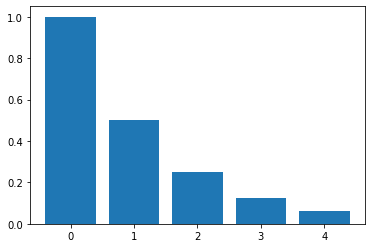

In [18]:
plt.bar(range(len(x)), adstock_geometric(x, 0.5))

<BarContainer object of 5 artists>

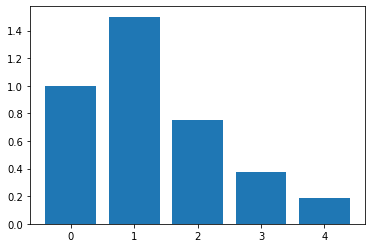

In [19]:
x = np.array([1.0, 1.0, 0.0, 0.0, 0.0])
plt.bar(range(len(x)), adstock_geometric(x, 0.5))

In [20]:
print(adstock_geometric(x, 0.4))

[1.     1.4    0.56   0.224  0.0896]


In [21]:
class AdstockGeometric(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.5):
        self.alpha = alpha
        
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        x_decay = np.zeros_like(X)
        x_decay[0] = X[0]

        for i in range(1, len(x_decay)):
            x_decay[i] = X[i] + self.alpha*x_decay[i-1]

        return x_decay      

In [22]:
AdstockGeometric(0.4).fit_transform(x)

array([1.    , 1.4   , 0.56  , 0.224 , 0.0896])

In [23]:
mmm_data = pd.read_csv("data_raw_Robyn.csv")

In [24]:
mmm_data.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,167687.6,0,95463.666667,7.290385e+07,0.000000,0,8125009,228213.987444,na,19401.653846
1,2015-11-30,2.584277e+06,214600.9,0,0.000000,1.658110e+07,29511.715457,31000,7901549,34258.573511,na,14791.000000
2,2015-12-07,2.547387e+06,0.0,248022,3404.000000,4.995477e+07,36132.358958,28400,8300197,127691.261335,na,14544.000000
3,2015-12-14,2.875220e+06,625877.3,0,132600.000000,3.164930e+07,36804.210958,31900,8122883,84014.720306,na,2800.000000
4,2015-12-21,2.215953e+06,0.0,520005,0.000000,8.802269e+06,28401.744069,27100,7105985,20687.478156,na,15478.000000


In [25]:
mmm_data.shape

(208, 12)

In [26]:
spend_cols = ["tv_S","ooh_S","print_S", "facebook_S"]

for col in spend_cols:
    print("------")
    print(col)
    print(AdstockGeometric(alpha=0.5).fit_transform(mmm_data[col]))

------
tv_S
[1.67687600e+05 2.98444700e+05 1.49222350e+05 7.00488475e+05
 3.50244238e+05 4.24311919e+05 2.17308859e+05 1.30796130e+05
 6.53980648e+04 3.26990324e+04 1.40188216e+05 7.00941081e+04
 5.32120354e+05 2.66060177e+05 4.44702289e+05 2.22351144e+05
 2.59468872e+05 1.29734436e+05 6.48672180e+04 3.24336090e+04
 1.62168045e+04 9.15589023e+04 4.57794511e+04 2.28897256e+04
 1.14448628e+04 5.72243139e+03 2.86121570e+03 1.43060785e+03
 7.15303924e+02 3.57651962e+02 1.53721726e+05 7.68608630e+04
 1.14338031e+05 5.71690157e+04 4.28376079e+04 2.14188039e+04
 2.22061302e+05 1.11030651e+05 2.70245425e+05 1.35122713e+05
 2.47495056e+05 2.83211328e+05 1.41605664e+05 7.08028320e+04
 3.54014160e+04 1.10172551e+06 5.50862754e+05 8.85851477e+05
 4.42925739e+05 9.26423769e+05 4.63211885e+05 6.24038842e+05
 3.64197321e+05 1.82098661e+05 1.97957330e+05 9.89786651e+04
 4.94893326e+04 8.32652266e+05 7.24233733e+05 3.62116867e+05
 2.25408133e+05 1.12704067e+05 3.58189233e+05 1.79094617e+05
 8.95473083e

In [16]:
def geoDecay(alpha, L):
    '''
    累積のAdstock割合(geometric decay)
    weight_T = alpha ^ T-1  
    '''
    return alpha**(np.ones(L).cumsum()-1)

def delayed_adstock(alpha, theta, L):
    '''
     累積のAdstock割合(dealyed adstock function)
    
    weight_T = thetaで引いたもので２乗 
    '''
    return alpha**((np.ones(L).cumsum()-1)-theta)**2

def carryover(x, alpha, L, theta = None, func='geo'):
    
    transformed_x = []
    if func=='geo':
        weights = geoDecay(alpha, L)
        plt.plot(weights)
        
    elif func=='delayed':
        print("delayed")
        weights = delayed_adstock(alpha, theta, L)
        plt.plot(weights)
    
    for t in range(x.shape[0]):
        upper_window = t+1
        lower_window = max(0,upper_window-L)
        current_window_x = x[:upper_window]
        t_in_window = len(current_window_x)
        if t < L:
            new_x = (current_window_x*np.flip(weights[:t_in_window], axis=0)).sum()
            print("new_x", new_x)
            transformed_x.append(new_x/weights[:t_in_window].sum())
            print("transform_x", transformed_x)
            print("weights", weights[:t_in_window].sum())
        elif t >= L:
            current_window_x = x[upper_window-L:upper_window]
            print("current_window", current_window_x)
            ext_weights = np.flip(weights, axis=0) 
            new_x = (current_window_x*ext_weights).sum()
            transformed_x.append(new_x/ext_weights.sum())
    return np.array(transformed_x)

In [17]:
x = np.array([2.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
print(len(x))
print(x)

12
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


new_x 2.0
transform_x [2.0]
weights 1.0
new_x 1.6
transform_x [2.0, 0.888888888888889]
weights 1.8
new_x 1.2800000000000002
transform_x [2.0, 0.888888888888889, 0.5245901639344263]
weights 2.4400000000000004
new_x 1.0240000000000002
transform_x [2.0, 0.888888888888889, 0.5245901639344263, 0.3468834688346884]
weights 2.9520000000000004
new_x 0.8192000000000002
transform_x [2.0, 0.888888888888889, 0.5245901639344263, 0.3468834688346884, 0.24369347929557353]
weights 3.3616000000000006
new_x 0.6553600000000002
transform_x [2.0, 0.888888888888889, 0.5245901639344263, 0.3468834688346884, 0.24369347929557353, 0.17763899731112848]
weights 3.6892800000000006
new_x 0.5242880000000002
transform_x [2.0, 0.888888888888889, 0.5245901639344263, 0.3468834688346884, 0.24369347929557353, 0.17763899731112848, 0.13268330606890075]
weights 3.9514240000000007
new_x 0.41943040000000015
transform_x [2.0, 0.888888888888889, 0.5245901639344263, 0.3468834688346884, 0.24369347929557353, 0.17763899731112848, 0.132

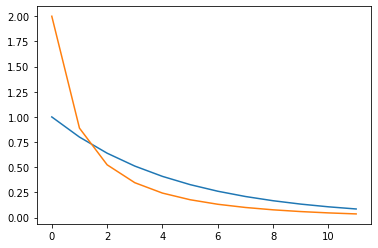

In [18]:
plt.plot(carryover(x, alpha=0.8, L=len(x)))

delayed


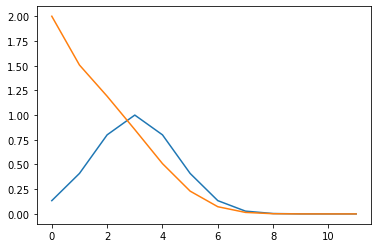

In [30]:
plt.plot(carryover(x, alpha=0.8, L=len(x), theta=3, func="delayed"))

2.3183568567084607

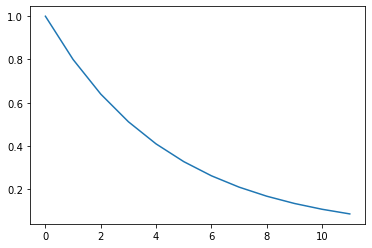

In [240]:
geo = carryover(x, alpha=0.8, L=len(x))
geo.sum()

delayed
delayed


2.3303969952496413

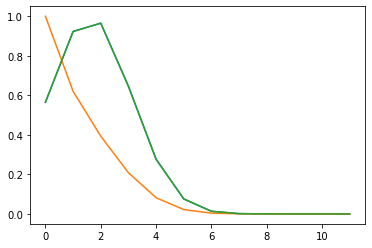

In [249]:
plt.plot(carryover(x, alpha=0.8, L=len(x), theta=1.6, func="delayed"))
delay = carryover(x, alpha=0.8, L=len(x), theta=1.6, func="delayed")
delay.sum()

# is_fittedやcheck_arrayを使うとエラーを拾いやすくなります。

In [3]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted

class AdstockGeometric(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.5):
        self.alpha = alpha
        
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        return self
    
    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        x_decayed = np.zeros_like(X)
        x_decayed[0] = X[0]
        
        for xi in range(1, len(x_decayed)):
            x_decayed[xi] = X[xi] + self.alpha* x_decayed[xi - 1]
        return x_decayed

In [4]:
x = np.array([1.0, 1.0, 0.0, 0.0, 0.0])
#エラーを発生させます。
AdstockGeometric(0.4).transform(x)

NotFittedError: This AdstockGeometric instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.